In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

In [2]:
df = pd.read_csv("./monthly-milk-production.csv", sep=";", 
                 parse_dates=['month'], dayfirst=True)

In [3]:
df.head()

,month,milk
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


### Вопрос 6
---

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову. Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

In [4]:
df["daily"] = df.milk / pd.DatetimeIndex(df.month).days_in_month

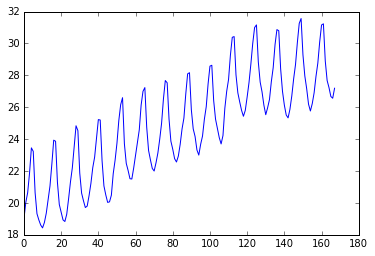

In [5]:
plt.plot(df["daily"].values)
plt.show()

### Вопрос 7
---
Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным. При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

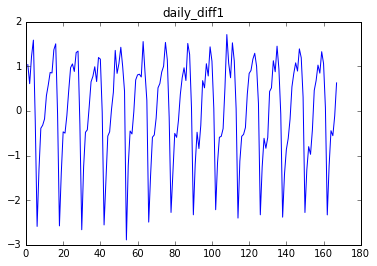

pvalue: 0.0643005465
--------------------------------------------------------------------------------


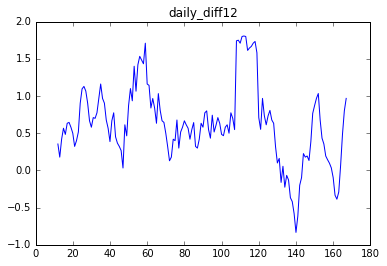

pvalue: 0.2212767266
--------------------------------------------------------------------------------


In [6]:
for x in [1, 12]:
    column_name = "daily_diff{}".format(x)
    df[column_name] = df["daily"] - df["daily"].shift(x)
    plt.plot(df[column_name])
    plt.title(column_name)
    plt.show()
    pvalue = sm.tsa.stattools.adfuller(df[column_name][x:])[1]
    print("pvalue: {}".format(np.around(pvalue, 10)))
    print("-"*80)

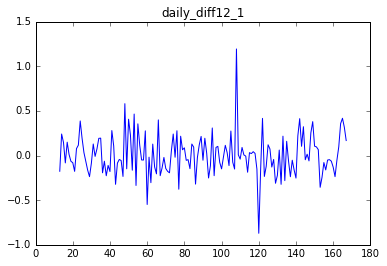

pvalue: 2.2808e-06


In [7]:
column_name = "daily_diff12_1"
df[column_name] = df.daily_diff12 - df.daily_diff12.shift(1)
plt.plot(df[column_name])
plt.title(column_name)
plt.show()
pvalue = sm.tsa.stattools.adfuller(df.daily_diff12_1[13:])[1]
print("pvalue: {}".format(np.around(pvalue, 10)))

### Вопрос 8
---
Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

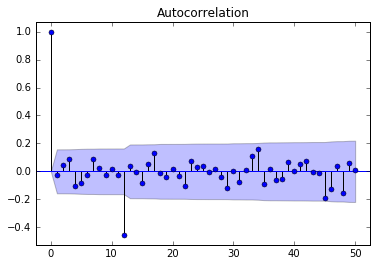

In [8]:
sm.graphics.tsa.plot_acf(df.daily_diff12_1[13:].values.squeeze(), lags=50)
plt.show()

1

### Вопрос 9
---
Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

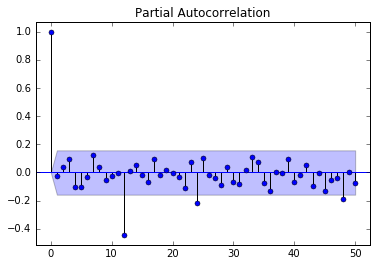

In [9]:
sm.graphics.tsa.plot_pacf(df.daily_diff12_1[13:].values.squeeze(), lags=50)
plt.show()

0